<a href="https://colab.research.google.com/github/wpcesaire/fintech-project-2/blob/master/Project2_starter_saturday_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Columbia University FinTech Program: Project 2

### Team Members:
#### Corey Recai
#### Whelan Power
#### Rachel Solomon
#### Ernest Subah

##### Objective: < TBD >

In [ ]:
# Import Libraries
import matplotlib.pyplot as plt
import os
import pandas as pd
get_ipython().run_line_magic("matplotlib", "inline")
import spacy
import numpy as np
import alpaca_trade_api as tradeapi
from scipy.stats import norm
%matplotlib inline
from spacy import displacy
from datetime import date, datetime, timedelta
nlp = spacy.load("en_core_web_sm")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from pathlib import Path
from dotenv import load_dotenv
load_dotenv()
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud
import re
import nltk
nltk.download("vader_lexicon")
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\esuba\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\esuba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\esuba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\esuba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Load Bitcoin file and Get Returns for Past xxx years
bitcoin_price = pd.read_csv(Path('Kraken_BTCUSD.csv'))

bitcoin_price.head(10)

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
0,7/2/2020,BTCUSD,9234.5,9269.2,9207.9,9207.9,393.65,3638576.38
1,7/1/2020,BTCUSD,9133.9,9300.3,9094.2,9234.5,3526.90,32493548.69
2,6/30/2020,BTCUSD,9183.5,9199.0,9061.3,9133.9,2685.90,24568044.42
3,6/29/2020,BTCUSD,9113.7,9230.0,9013.0,9183.5,4167.45,38044216.83
4,6/28/2020,BTCUSD,9002.0,9189.3,8937.5,9113.7,2563.55,23264322.25
5,6/27/2020,BTCUSD,9150.3,9183.3,8812.8,9002.0,4250.28,38322054.84
6,6/26/2020,BTCUSD,9233.5,9285.0,9028.6,9150.3,5300.72,48566374.72
7,6/25/2020,BTCUSD,9282.0,9337.5,8992.4,9233.5,6244.42,57446412.92
8,6/24/2020,BTCUSD,9622.3,9661.7,9200.0,9282.0,5937.47,55703453.17
9,6/23/2020,BTCUSD,9694.0,9721.3,9575.8,9622.3,3628.24,34974789.86


In [ ]:
# Drop Bitcoing symbol, open, high, low and Volume USD
bitcoin_price.drop(columns=['Symbol','Volume USD'], inplace=True)

In [ ]:
bitcoin_price.head(10)

,Date,Open,High,Low,Close,Volume BTC
0,7/2/2020,9234.5,9269.2,9207.9,9207.9,393.65
1,7/1/2020,9133.9,9300.3,9094.2,9234.5,3526.90
2,6/30/2020,9183.5,9199.0,9061.3,9133.9,2685.90
3,6/29/2020,9113.7,9230.0,9013.0,9183.5,4167.45
4,6/28/2020,9002.0,9189.3,8937.5,9113.7,2563.55
5,6/27/2020,9150.3,9183.3,8812.8,9002.0,4250.28
6,6/26/2020,9233.5,9285.0,9028.6,9150.3,5300.72
7,6/25/2020,9282.0,9337.5,8992.4,9233.5,6244.42
8,6/24/2020,9622.3,9661.7,9200.0,9282.0,5937.47
9,6/23/2020,9694.0,9721.3,9575.8,9622.3,3628.24


In [ ]:
bitcoin_price.tail(10)

,Date,Open,High,Low,Close,Volume BTC
2440,10/15/2013,135.59,153.00,133.88,133.88,4.30
2441,10/14/2013,131.84,135.59,131.84,135.59,12.01
2442,10/13/2013,127.00,131.84,127.00,131.84,0.10
2443,10/12/2013,125.86,127.50,125.86,127.00,4.00
2444,10/11/2013,125.86,125.86,125.86,125.86,0.00
2445,10/10/2013,123.84,125.86,123.84,125.86,2.00
2446,10/9/2013,124.18,124.18,123.84,123.84,2.82
2447,10/8/2013,123.61,124.19,123.61,124.18,3.99
2448,10/7/2013,122.00,123.61,122.00,123.61,0.10
2449,10/6/2013,238.00,238.00,122.00,122.00,0.10


In [ ]:
bitcoin_price['month'] = pd.to_datetime(bitcoin_price['Date']).dt.month
bitcoin_price['year'] = pd.to_datetime(bitcoin_price['Date']).dt.year

In [ ]:
bitcoin_price = bitcoin_price[['month', 'year', 'Close', 'Volume BTC']]
bitcoin_price.head(10)

,month,year,Close,Volume BTC
0,7,2020,9207.9,393.65
1,7,2020,9234.5,3526.90
2,6,2020,9133.9,2685.90
3,6,2020,9183.5,4167.45
4,6,2020,9113.7,2563.55
5,6,2020,9002.0,4250.28
6,6,2020,9150.3,5300.72
7,6,2020,9233.5,6244.42
8,6,2020,9282.0,5937.47
9,6,2020,9622.3,3628.24


In [ ]:
bitcoin_price = bitcoin_price.groupby(['year','month'])['Close', 'Volume BTC'].mean()

In [ ]:
bitcoin_price.head(10)

Close  Volume BTC
year month                        
2013 10     157.503462   17.912523
     11     545.946333   33.560333
     12     795.705806   44.567419
2014 1      831.454839   23.316774
     2      667.814286   31.096786
     3      603.351935   13.635806
     4      468.432333   13.903137
     5      489.022581    9.305716
     6      612.934667   15.210683
     7      618.785484    6.349924

In [ ]:
# Create a new column for price returns
bitcoin_price['Price_Returns'] = bitcoin_price.Close.pct_change()

# Create a new column for Adoption Rate
bitcoin_price['Adoption_Rate'] = bitcoin_price['Volume BTC'].pct_change()

In [ ]:
bitcoin_price.head(10)

Close  Volume BTC  Price_Returns  Adoption_Rate
year month                                                      
2013 10     157.503462   17.912523            NaN            NaN
     11     545.946333   33.560333       2.466250       0.873568
     12     795.705806   44.567419       0.457480       0.327979
2014 1      831.454839   23.316774       0.044927      -0.476820
     2      667.814286   31.096786      -0.196812       0.333666
     3      603.351935   13.635806      -0.096527      -0.561504
     4      468.432333   13.903137      -0.223617       0.019605
     5      489.022581    9.305716       0.043956      -0.330675
     6      612.934667   15.210683       0.253387       0.634553
     7      618.785484    6.349924       0.009546      -0.582535

In [ ]:
bitcoin_price = bitcoin_price.dropna()
bitcoin_price.head()

Close  Volume BTC  Price_Returns  Adoption_Rate
year month                                                      
2013 11     545.946333   33.560333       2.466250       0.873568
     12     795.705806   44.567419       0.457480       0.327979
2014 1      831.454839   23.316774       0.044927      -0.476820
     2      667.814286   31.096786      -0.196812       0.333666
     3      603.351935   13.635806      -0.096527      -0.561504

In [ ]:
Adoption_Rate_Sentiment = []
tempdf = pd.DataFrame(bitcoin_price['Adoption_Rate'])

for index, row in tempdf.iterrows():
  #print(row)
  if (row >= 0).bool():
    Adoption_Rate_Sentiment.append(1)
  else:
    Adoption_Rate_Sentiment.append(0)

bitcoin_price['Adoption_Sentiment'] = Adoption_Rate_Sentiment

bitcoin_price.tail(20)

Close    Volume BTC  Price_Returns  Adoption_Rate  \
year month                                                             
2018 12      3660.961290  10809.249677      -0.315361       0.420798   
2019 1       3658.887097   5676.563871      -0.000567      -0.474842   
     2       3659.517857   5037.871786       0.000172      -0.112514   
     3       3870.152632   3066.398947       0.057558      -0.391330   
     4       5145.396667   6688.315667       0.329507       1.181163   
     5       7290.680645   9762.940968       0.416933       0.459701   
     6       9396.356667   9015.924667       0.288817      -0.076515   
     7      10668.674194   8513.994194       0.135405      -0.055672   
     8      10631.609677   5779.655806      -0.003474      -0.321158   
     9       9790.593333   5091.644333      -0.079105      -0.119040   
     10      8382.764516   5464.444194      -0.143794       0.073218   
     11      8336.563333   4527.781000      -0.005511      -0.171411   
     12      7244.661290   4116.247097      -0.130977      -0.090891   
2020 1       8369.129032   5874.012903       0.155213       0.427031   
     2       9639.193103   4580.181724       0.151756      -0.220264   
     3       6874.983871  12572.352903      -0.286768       1.744946   
     4       7222.033333   8800.528333       0.050480      -0.300009   
     5       9257.038710   8811.408387       0.281777       0.001236   
     6       9478.633333   5290.551000       0.023938      -0.399579   
     7       9221.200000   1960.275000      -0.027159      -0.629476   

            Adoption_Sentiment  
year month                      
2018 12                      1  
2019 1                       0  
     2                       0  
     3                       0  
     4                       1  
     5                       1  
     6                       0  
     7                       0  
     8                       0  
     9                       0  
     10                      1  
     11                      0  
     12                      0  
2020 1                       1  
     2                       0  
     3                       1  
     4                       0  
     5                       1  
     6                       0  
     7                       0

### Statistical Analysis

In [ ]:
bitcoin_price.Price_Returns.describe()

count    81.000000
mean      0.085325
std       0.342350
min      -0.315361
25%      -0.078662
50%       0.029252
75%       0.148515
max       2.466250
Name: Price_Returns, dtype: float64

In [ ]:
# define Price_Returns constants
price_mu = 0.085325 
price_sigma = 0.342350
price_x1 = -0.315361
price_x2 = 2.466250

In [ ]:
# calculate the z-transform
price_z1 = ( price_x1 - price_mu ) / price_sigma
price_z2 = ( price_x2 - price_mu ) / price_sigma

In [ ]:
# After the Z-transform of the lower and upper bounds are calculated, 
# we calculate the probability with SciPy's scipy.stats.norm.pdf() function
price_x = np.arange(price_z1, price_z2, 0.1) # range of x in spec
price_x_all = np.arange(-3, 3, 0.1) # entire range of x, both in and out of spec
# mean = 0, stddev = 1, since Z-transform was calculated
price_y = norm.pdf(price_x,0,1)
price_y2 = norm.pdf(price_x_all,0,1)

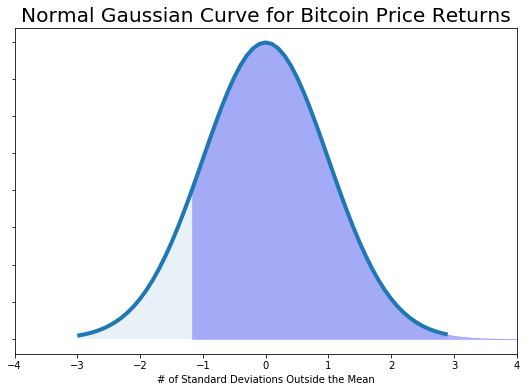

In [ ]:
# build the plot
fig, price_ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
price_ax.plot(price_x_all,price_y2)

price_ax.fill_between(price_x,price_y,0, alpha=0.3, color='b')
price_ax.fill_between(price_x_all,price_y2,0, alpha=0.1)
price_ax.set_xlim([-4,4])
price_ax.set_xlabel('# of Standard Deviations Outside the Mean')
price_ax.set_yticklabels([])
price_ax.set_title('Normal Gaussian Curve for Bitcoin Price Returns')

plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
plt.show()

In [ ]:
bitcoin_price.Adoption_Rate.describe()

count    81.000000
mean      0.249218
std       0.800782
min      -0.632189
25%      -0.300009
50%       0.001236
75%       0.461849
max       3.874726
Name: Adoption_Rate, dtype: float64

In [ ]:
# define adoption_Returns constants
adoption_mu = 0.249218 
adoption_sigma = 0.800782
adoption_x1 = -0.632189
adoption_x2 = 3.874726

In [ ]:
# calculate the z-transform
adoption_z1 = ( adoption_x1 - adoption_mu ) / adoption_sigma
adoption_z2 = ( adoption_x2 - adoption_mu ) / adoption_sigma

In [ ]:
# After the Z-transform of the lower and upper bounds are calculated, 
# we calculate the probability with SciPy's scipy.stats.norm.pdf() function
adoption_x = np.arange(adoption_z1, adoption_z2, 0.1) # range of x in spec
adoption_x_all = np.arange(-5, 5, 0.1) # entire range of x, both in and out of spec
# mean = 0, stddev = 1, since Z-transform was calculated
adoption_y = norm.pdf(adoption_x,0,1)
adoption_y2 = norm.pdf(adoption_x_all,0,1)

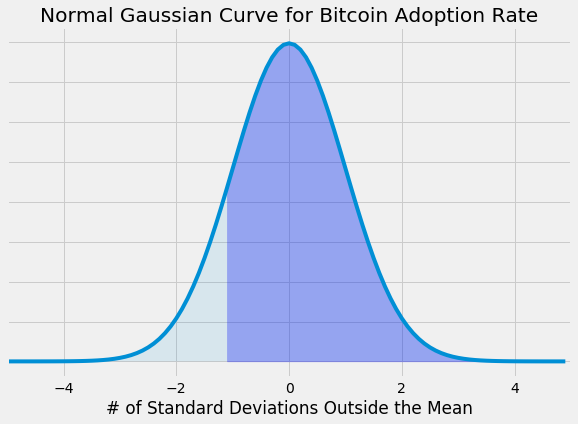

In [ ]:
# build the plot
fig, adoption_ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
adoption_ax.plot(adoption_x_all,adoption_y2)

adoption_ax.fill_between(adoption_x,adoption_y,0, alpha=0.3, color='b')
adoption_ax.fill_between(adoption_x_all,adoption_y2,0, alpha=0.1)
adoption_ax.set_xlim([-5,5])
adoption_ax.set_xlabel('# of Standard Deviations Outside the Mean')
adoption_ax.set_yticklabels([])
adoption_ax.set_title('Normal Gaussian Curve for Bitcoin Adoption Rate')

plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
plt.show()

In [ ]:
# Solve for the correlation between Price Returns and Adoption Rate
correlation_df = bitcoin_price[['Price_Returns', 'Adoption_Rate']]
correlation_df.head()

Price_Returns  Adoption_Rate
year month                              
2013 11          2.466250       0.873568
     12          0.457480       0.327979
2014 1           0.044927      -0.476820
     2          -0.196812       0.333666
     3          -0.096527      -0.561504

In [ ]:
correlation_df.tail()

Price_Returns  Adoption_Rate
year month                              
2020 3          -0.286768       1.744946
     4           0.050480      -0.300009
     5           0.281777       0.001236
     6           0.023938      -0.399579
     7          -0.027159      -0.629476

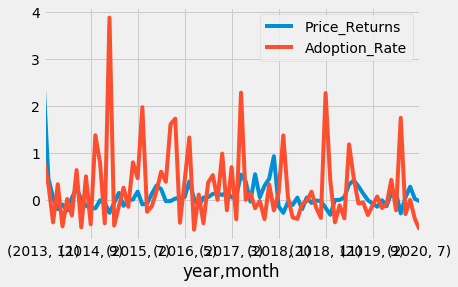

In [ ]:
correlation_df.plot()

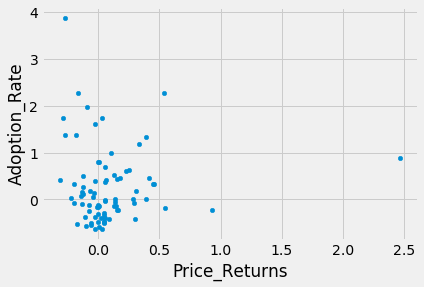

In [ ]:
# Plot the relationship between the two variables
correlation_df.plot(kind='scatter', x='Price_Returns', y='Adoption_Rate')

In [ ]:
# Calculate the correlation between each column
correlation = correlation_df.corr()
correlation

,Price_Returns,Adoption_Rate
Price_Returns,1.000000,0.012138
Adoption_Rate,0.012138,1.000000


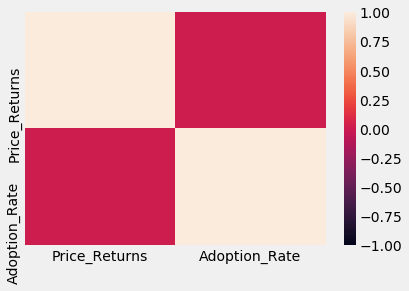

In [ ]:
# Use the `heatmap` function from the Seaborn library to visualize correlations
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

In [ ]:
from scipy.stats import skew
print('Price Returns Skewness is:', skew(correlation_df.Price_Returns))

Price Returns Skewness is: 4.418608793833378


In [ ]:
from scipy.stats import skew
print('Adoption Rate Skewness is:', skew(correlation_df.Adoption_Rate))

Adoption Rate Skewness is: 1.851880901702074


In [ ]:
y = bitcoin_price["Adoption_Sentiment"]
X = bitcoin_price.drop(columns=["Adoption_Rate", "Volume BTC", "Adoption_Sentiment"])

In [ ]:
y.head(5)

year  month
2013  11       1
      12       1
2014  1        0
      2        1
      3        0
Name: Adoption_Sentiment, dtype: int64

In [ ]:
X.head(5)

Close  Price_Returns
year month                           
2013 11     545.946333       2.466250
     12     795.705806       0.457480
2014 1      831.454839       0.044927
     2      667.814286      -0.196812
     3      603.351935      -0.096527

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(60, 2)

In [ ]:
y_train.shape

(60,)

In [ ]:
X_test.shape

(21, 2)

In [ ]:
y_test.shape

(21,)

In [ ]:
# Create the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Fit/Train the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Score/Validate the model
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6333333333333333
Testing Data Score: 0.42857142857142855


In [ ]:
# Make Predictions
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,1,0
1,1,0
2,1,1
3,1,0
4,1,1
5,1,0
6,1,1
7,0,1
8,1,1
9,1,1


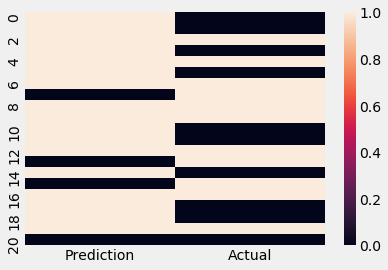

In [ ]:
import seaborn as sns
sns.heatmap(results)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[1, 9],
       [3, 8]], dtype=int64)

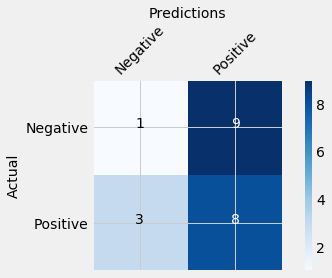

In [ ]:
import itertools
matrix = confusion_matrix(y_test, predictions)
class_names = ['Negative','Positive']
plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

# plot colorbar to the right
plt.colorbar()

fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('Actual',size=14)
plt.xlabel('Predictions',size=14)
plt.show()

In [ ]:
# Create a classification report
from sklearn.metrics import classification_report
target_names = ["Positive", "Negative"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

    Positive       0.25      0.10      0.14        10
    Negative       0.47      0.73      0.57        11

    accuracy                           0.43        21
   macro avg       0.36      0.41      0.36        21
weighted avg       0.37      0.43      0.37        21



In [ ]:
# Load Bitcoin/crypto news file and Get news for Past xxx years
bitcoin_news = pd.read_csv(Path('NYT_news_bitcoin.csv'))

bitcoin_news.head(10)

,published_date,snippet,lead_paragraph,headline
0,2017-08-03T20:18:38+0000,After years as a niche market for technologica...,"Most readers have probably heard of Bitcoin, t...",Grandpa Had a Pension. This Generation Has Cry...
1,2018-07-29T20:16:47+0000,With their eyes on blockchain jobs and revenue...,SAN FRANCISCO — Hedge funds go to the Cayman I...,"Have a Cryptocurrency Company? Bermuda, Malta ..."
2,2020-02-12T22:29:15+0000,The rules will improve transparency in hopes o...,WASHINGTON — The Trump administration plans to...,Treasury to Roll Out Cryptocurrency Rules
3,2018-11-21T22:38:57+0000,"A year ago, Bitcoin and other digital currenci...",SAN FRANCISCO — The news on Wall Street this w...,5 Reasons Cryptocurrency Prices Are Plunging A...
4,2018-09-25T19:15:56+0000,"When it comes to Bitcoin and the like, governm...",Cryptocurrencies like Bitcoin have lost over h...,The Trouble With Cryptocurrency’s Viral Growth
5,2018-08-20T09:00:07+0000,The number of people who bought virtual curren...,"SAN FRANCISCO — Pete Roberts of Nottingham, En...",After the Bitcoin Boom: Hard Lessons for Crypt...
6,2019-07-15T23:14:52+0000,The Treasury secretary raised concerns about c...,WASHINGTON — Treasury Secretary Steven Mnuchin...,Cryptocurrencies Pose National Security Threat...
7,2019-01-10T13:07:46+0000,The police have been investigating the woman’s...,OSLO — The wife of a wealthy Norwegian busines...,Cryptocurrency Ransom Demanded for Wife of Nor...
8,2018-01-30T21:47:13+0000,The social network said it wanted to prevent m...,SAN FRANCISCO — Want to get rich quick through...,Facebook Bans Ads for Bitcoin and Other Crypto...
9,2018-03-30T23:01:02+0000,"From Bitcoin to Litecoin to Ethereum, we expla...","From Bitcoin to Litecoin to Ethereum, we expla...",Baffled by Bitcoin? How Cryptocurrency Works
